# CGARCH modelling

The component GARCH by Engle and Lee can be specified by the following equations:

$$
\sigma^{2}_{t}=q_{t}+g_{t}\\
q_{t}=\omega + \rho q_{t-1} + \phi(r^{2}_{t-1}-\sigma^{2}_{t-1})\\
g_{t} = \alpha(r^{2}_{t-1}-q_{t-1})+\beta g_{t-1}
$$
where:

$\sigma^{2}_{t}$ is the total variance

$q_{t}$ is the long term component and

$g_{t}$ is the short term component

Usually $\rho$ is meant to be extremely close to one to make the long term component slow moving. The model is accessed in a similar manner to other models in the package but once it is fit, it will have the extra attribute of the longterm component and when forecast there will be an attribute of longterm variance.


### Get the necessary imports and data

In [1]:
from arch.univariate import CGARCH, arch_model
from pandas_datareader.data import DataReader
import datetime as dt


start = dt.datetime(2006, 2, 8)
end = dt.datetime(2017, 3, 20)

df = DataReader("^DJI", "yahoo", start, end)
returns = 100 * df["Adj Close"].pct_change()[1:].fillna(value=0)



### Setup the mean model and fit it

In [2]:
model = arch_model(y=returns, vol="cgarch")
#alternatively you can specify volatility as model.volatility = CGARCH()

fit_model = model.fit(update_freq=5)

Iteration:      5,   Func. Count:     50,   Neg. LLF: 3763.870472556907
Iteration:     10,   Func. Count:     95,   Neg. LLF: 3656.081158330028
Iteration:     15,   Func. Count:    137,   Neg. LLF: 3641.5291274878878
Iteration:     20,   Func. Count:    177,   Neg. LLF: 3641.4959764350515
Iteration:     25,   Func. Count:    218,   Neg. LLF: 3638.05236416545
Iteration:     30,   Func. Count:    263,   Neg. LLF: 3637.531650897108
Iteration:     35,   Func. Count:    308,   Neg. LLF: 3636.138624713658
Iteration:     40,   Func. Count:    350,   Neg. LLF: 3635.156314955804
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3635.120117565214
            Iterations: 44
            Function evaluations: 384
            Gradient evaluations: 44


In [3]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Constant Mean - ComponentGARCH Model Results                 
==============================================================================
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:             ComponentGARCH   Log-Likelihood:               -3635.12
Distribution:                  Normal   AIC:                           7282.24
Method:            Maximum Likelihood   BIC:                           7317.86
                                        No. Observations:                 2796
Date:                Sun, Aug 06 2017   Df Residuals:                     2790
Time:                        06:23:03   Df Model:                            6
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0710  1.431e-02      4.966  6.829e-07 [4.300e-02,9.908e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
alpha          0.0813  2.182e-02      3.725  1.951e-04   [3.853e-02,  0.124]
beta           0.8713  2.341e-02     37.220 3.251e-303     [  0.825,  0.917]
omega      9.6364e-03  4.234e-03      2.276  2.286e-02 [1.337e-03,1.794e-02]
rho            0.9909  4.441e-03    223.141      0.000     [  0.982,  1.000]
phi            0.0443  2.121e-02      2.089  3.669e-02 [2.741e-03,8.589e-02]
============================================================================

Covariance estimator: robust
"""

### To view the conditional volatility

In [4]:
volatility = fit_model.conditional_volatility
volatility.head()

Date
2006-02-09    0.521270
2006-02-10    0.489221
2006-02-13    0.466583
2006-02-14    0.451774
2006-02-15    0.595688
Name: cond_vol, dtype: float64

### Long term component

In [5]:
component = fit_model.longterm_variance
component.head()

Date
2006-02-09    0.050000
2006-02-10    0.048228
2006-02-13    0.049746
2006-02-14    0.053703
2006-02-15    0.115318
Name: Longterm variance, dtype: float64

The longterm component must be compared to the total variance not volatlity, therefore we square it.

In [6]:
total_variance = volatility**2
total_variance.name = "Total variance"

## View plots to compare movements of returns and variance

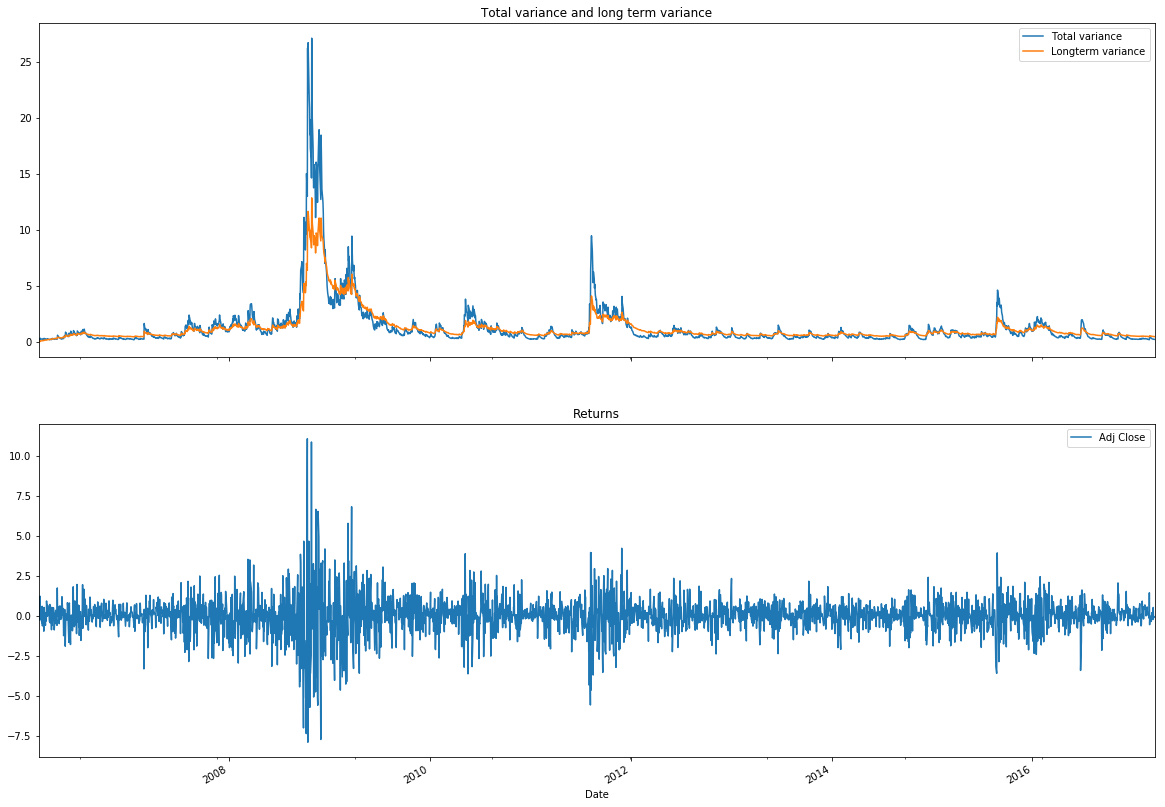

In [7]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 20, 15
fig, ax = plt.subplots(2, sharex=True)

total_variance.plot(legend=True, ax=ax[0])
component.plot(legend=True, ax=ax[0])
ax[0].set_title("Total variance and long term variance")
# ax[0].set_ylim([0, 0.01])

returns.plot(title="Returns", legend=True, ax=ax[1])
plt.legend(loc="upper right")
